In [15]:
%pip install icrawler
%pip install cv2
%pip install matplotlib
%pip install numpy
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 23.7/23.7 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 42.2/42.2 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 216.4/216.4 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Mengambil dataset kucing dari internet
from icrawler.builtin import GoogleImageCrawler

classes = ['cat']
size = 10

for c in classes :
    crawler = GoogleImageCrawler(storage={'root_dir':f'dataset/{c.replace(" ", ".")}'})
    crawler.crawl(keyword=c, filters=None, max_num=size, offset=0)

2023-03-06 21:56:04,851 - INFO - icrawler.crawler - start crawling...
2023-03-06 21:56:04,858 - INFO - icrawler.crawler - starting 1 feeder threads...
2023-03-06 21:56:04,865 - INFO - icrawler.crawler - starting 1 parser threads...
2023-03-06 21:56:04,867 - INFO - feeder - thread feeder-001 exit
2023-03-06 21:56:04,877 - INFO - icrawler.crawler - starting 1 downloader threads...
2023-03-06 21:56:05,726 - INFO - parser - parsing result page https://www.google.com/search?q=cat&ijn=0&start=0&tbs=&tbm=isch
2023-03-06 21:56:07,006 - ERROR - downloader - Exception caught when downloading file https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg, error: HTTPSConnectionPool(host='i.natgeofe.com', port=443): Max retries exceeded with url: /n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:992)'))), remaining retry times: 

2023-03-06 21:56:25,318 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2023-03-06 21:56:25,320 - INFO - parser - thread parser-001 exit


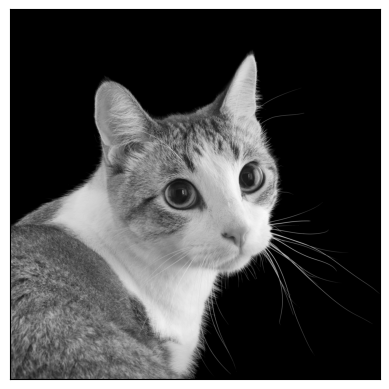

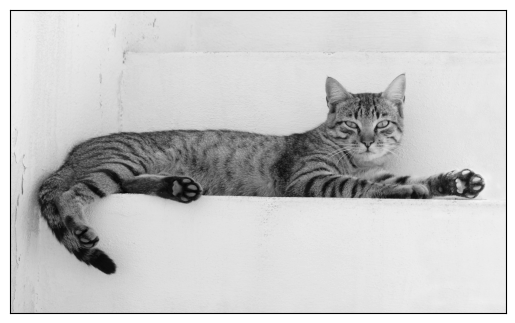

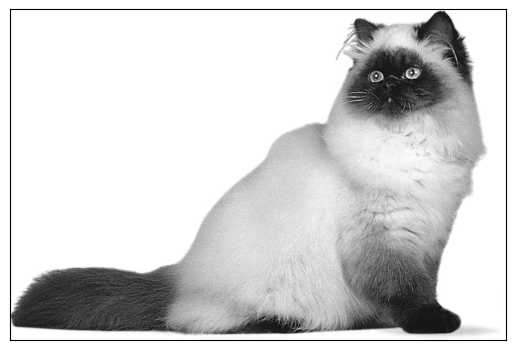

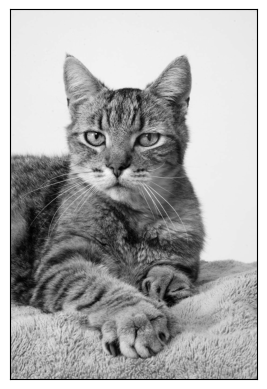

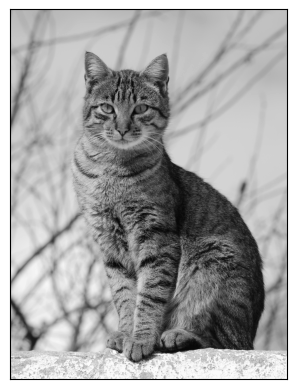

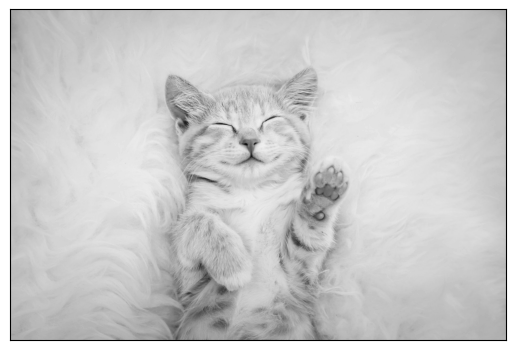

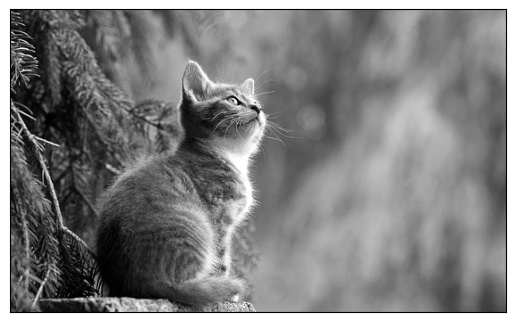

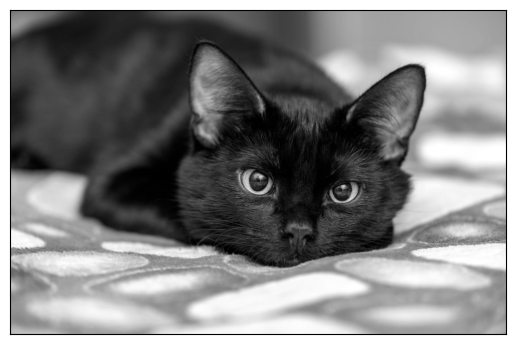

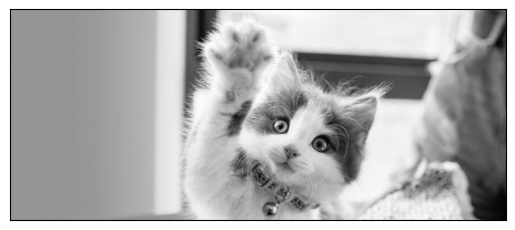

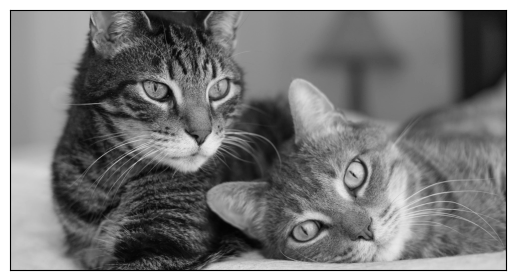

In [10]:
# Mengubah gambar yang sudah difetch menjadi grayscaled
import cv2
import os
from matplotlib import pyplot as plt

images = os.listdir("./dataset/cat")
for img in images :
    filedir = './dataset/cat/' + img
    imageFile = cv2.imread(filedir)
    grayImage = cv2.cvtColor(imageFile, cv2.COLOR_BGR2GRAY) # Convert to gray

    # Saving image file
    cv2.imwrite("dataset/catgray/"+img, grayImage)
    plt.imshow(grayImage, cmap='gray')
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

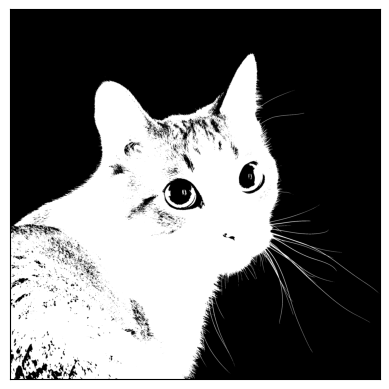

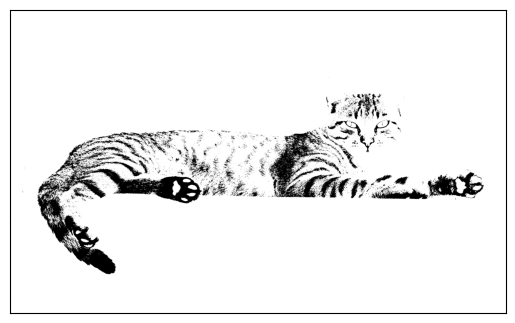

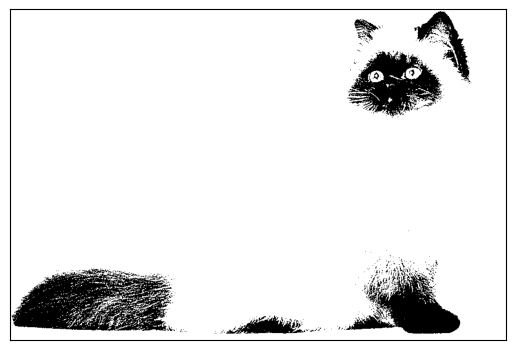

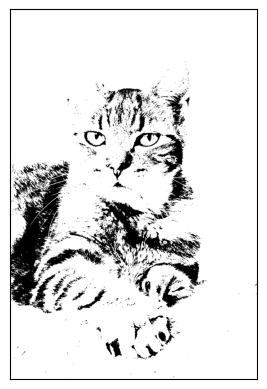

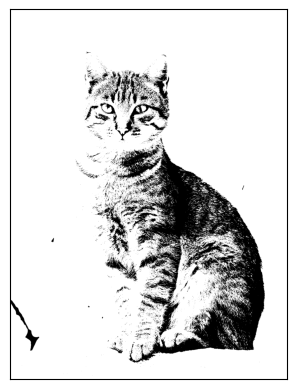

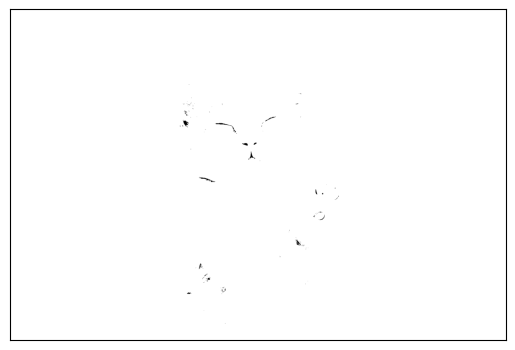

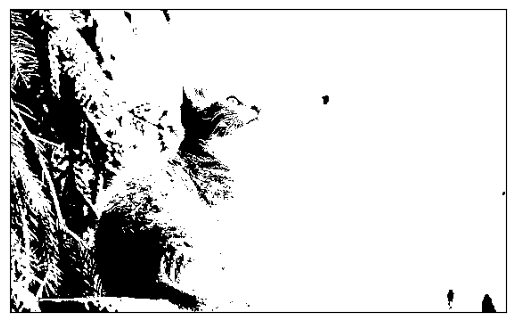

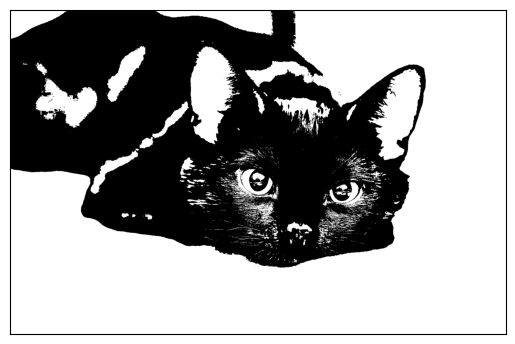

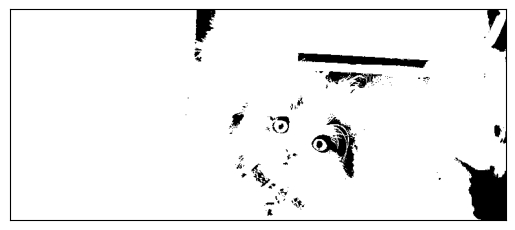

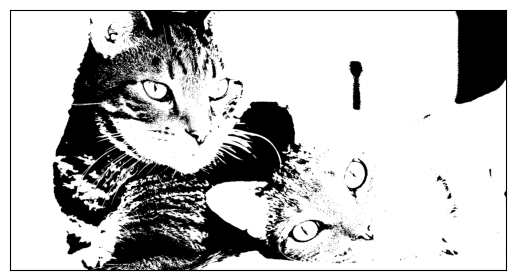

In [11]:
# Mengubah gambar yang sudah difetch menjadi bitmap
for img in images :
    filedir = './dataset/cat/' + img
    imageFile = cv2.imread(filedir)
    grayImage = cv2.cvtColor(imageFile, cv2.COLOR_BGR2GRAY) # Convert to gray
    ret, thresh = cv2.threshold(grayImage, 70,255,0) # Convert to binary

    # Saving image file
    cv2.imwrite("dataset/binary/"+img, thresh)
    plt.imshow(thresh, cmap='gray')
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

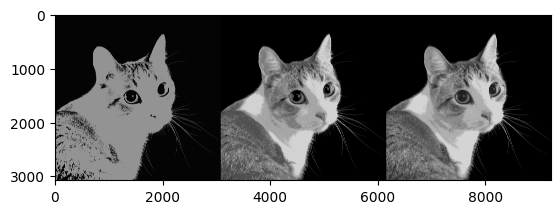

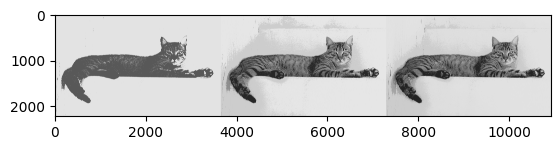

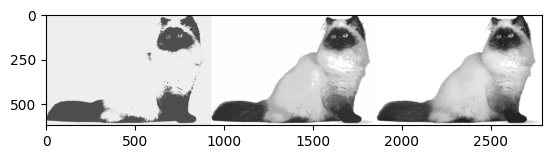

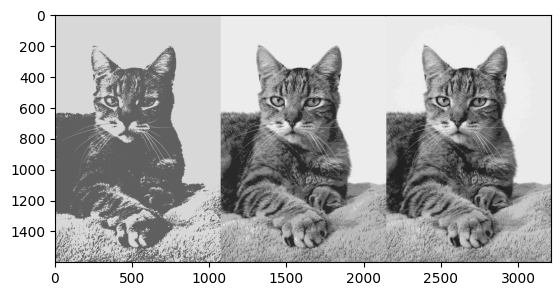

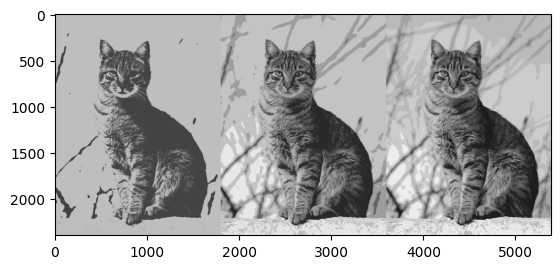

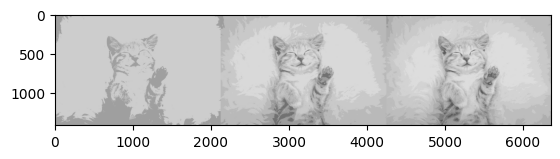

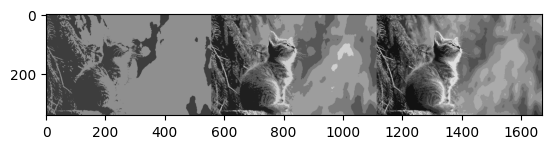

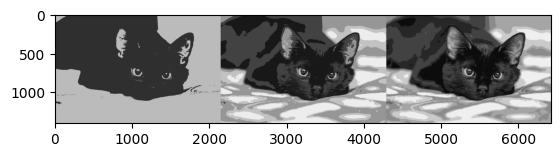

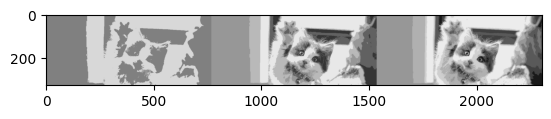

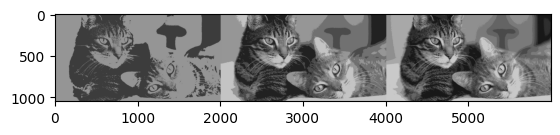

In [17]:
#quantization gambar grayscale
import numpy as np
images = os.listdir("./dataset/catgray")
import numpy as np

%matplotlib inline
def quantimage(image,k):
    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
    ret,label,center = cv2.kmeans(i, k , None, condition,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    final_img = center[label.flatten()]
    final_img = final_img.reshape(image.shape)
    return final_img

for img in images :
    filedir = './dataset/catgray/' + img
    imageFile = cv2.imread(filedir)
    imgH = cv2.hconcat([quantimage(imageFile, 2), quantimage(imageFile, 5), quantimage(imageFile, 8)])
    plt.imshow(imgH)
    plt.show()

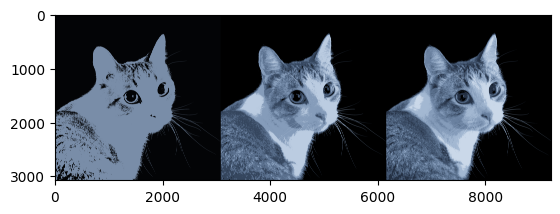

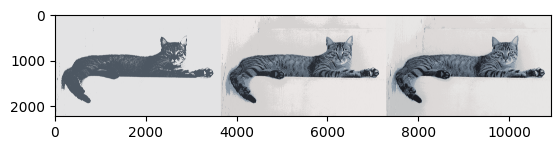

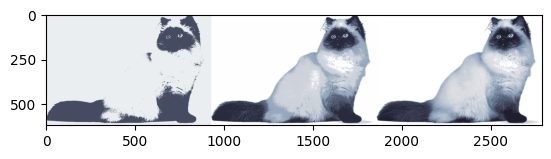

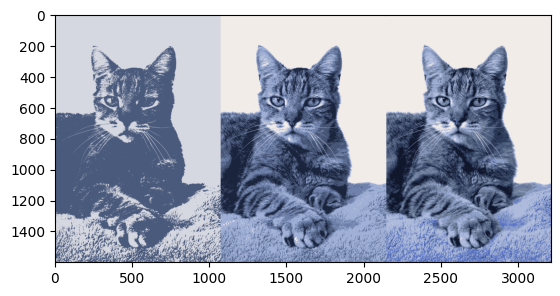

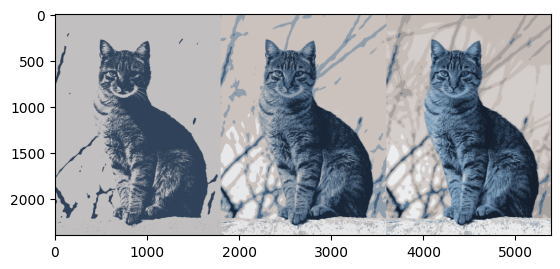

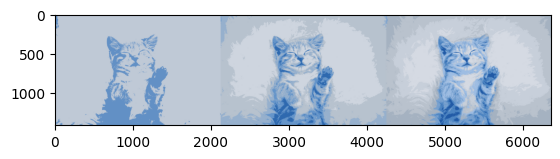

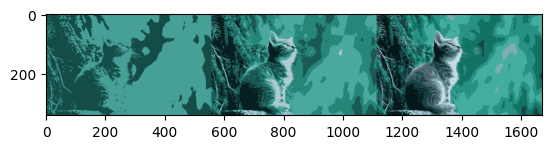

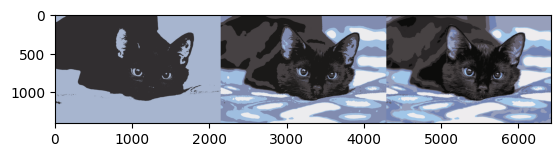

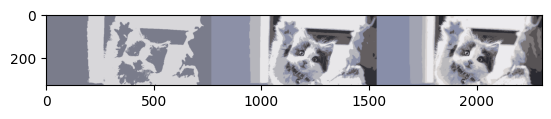

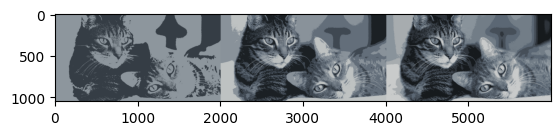

In [18]:
#quantization gambar colored
import numpy as np
images = os.listdir("./dataset/cat")
import numpy as np

%matplotlib inline
def quantimage(image,k):
    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
    ret,label,center = cv2.kmeans(i, k , None, condition,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    final_img = center[label.flatten()]
    final_img = final_img.reshape(image.shape)
    return final_img

for img in images :
    filedir = './dataset/cat/' + img
    imageFile = cv2.imread(filedir)
    imgH = cv2.hconcat([quantimage(imageFile, 2), quantimage(imageFile, 5), quantimage(imageFile, 8)])
    plt.imshow(imgH)
    plt.show()

Quantization merupakan teknik pemrosesan gambar yaitu kompresi gambar secara lossy dengan mengkompres beberapa nilai menjadi satu nilai diskrit. Pada contoh diatas, proses quantization dilakukan dengan menggunakan algoritma K-Means. Dari masing masing contoh gambar dilakukan 3 kali proses quantization dengan K yang berbeda yaitu gambar pertama K = 2, gambar kedua K = 5, dan gambar terakhir K = 8. Dari hasil diatas didapatkan dengan menggunakan K = 5 untuk mendapatkan gambar yang cukup terkompresi dengan detail yang hilang minimum apabila dibandingkan dengan K = 2, dan apabila dibandingkan dengan gambar K = 8 detail yang diperoleh K = 8 tidak signifikan lebih banyak dengan K = 5. Sehingga pada proses ini K = 5 lebih baik dalam pengkompresian gambar.